# Polynomial Regression

In this notebook, we study polynomial regression. 

The example is coming from 
<a href="https://en.wikipedia.org/wiki/Logistic_regression">Logistic regression in Wikipedia</a>.
I also studied <a href="https://github.com/Sieye-R/Machine_Learning/blob/main/Scikit_Learn/Very_Basic/Simple%20Linear%20Regression.ipynb">simple linear regression</a> with this example.

The table indicates the number of hours twenty students spent studying for an exam and whether or not they passed (1) or faild (0).

In [1]:
import pandas as pd
df = pd.DataFrame({
    'Hours': [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5],
    'Result': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]})
df

,Hours,Result
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


The following is the graph.

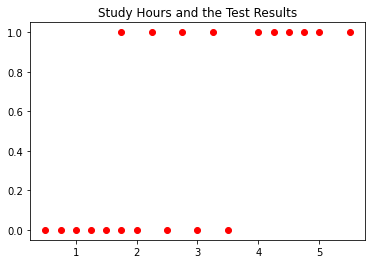

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['Hours'], df['Result'], 'ro')
plt.title("Study Hours and the Test Results")
plt.show()

### 1. Linear Regression

We first recall how to construct a linear predictor function with scikit learn.

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

The linear predictor function is as follows.

In [5]:
print(f"The linear predictor function is y = {regressor.coef_.item()}*x + ({regressor.intercept_}).")

The linear predictor function is y = 0.2345956121931792*x + (-0.15393526898848708).


The following is the graph.

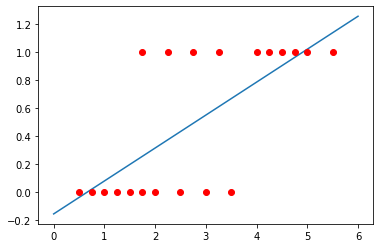

In [6]:
import numpy as np

X_new = np.linspace(0,6,10)
y_new = regressor.predict(X_new.reshape(-1, 1))

plt.plot(X_new, y_new)
plt.plot(df['Hours'], df['Result'], 'ro')
plt.show()

### 2. Polynomial Regression

Now we establish polynomial regressions. I do not understand why the bias is required in polynomial regression yet. I do not include the bias.
Constructing polynomial regression is actually the same as how to construct a linear regression.
We first construct the polynomial regression of the second degree.
since we exclude the bias, we have two independent variables, `Hours` and `Hours^2`. The following is the data for the polynomial regression of the second degree.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
PolyFeats = PolynomialFeatures(degree=2, include_bias=False)
dfpoly = pd.DataFrame(PolyFeats.fit_transform(X), columns=('Hours', 'Hours^2'))
dfpoly['result'] = df['Result']
dfpoly

,Hours,Hours^2,result
0,0.50,0.2500,0
1,0.75,0.5625,0
2,1.00,1.0000,0
3,1.25,1.5625,0
4,1.50,2.2500,0
5,1.75,3.0625,0
6,1.75,3.0625,1
7,2.00,4.0000,0
8,2.25,5.0625,1
9,2.50,6.2500,0


Let's find the formula of the polynomial regression of the second degree.

In [8]:
dX = dfpoly.iloc[:, :-1].values
dy = dfpoly.iloc[:, 1].values

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polyreg.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_poly, y)

second = f"The coefficients are {regressor.coef_} and the intercept is {regressor.intercept_}."
print(second)

The coefficients are [ 0.28242337 -0.00810915] and the intercept is -0.20674647408291502.


So what is the formula?

In [10]:
coef_list = list(regressor.coef_)
new_second = "The polynomial regression of the second degree is \
y = %.4f + (%.4f) Hours + (%.4f) Hours^2." %(regressor.intercept_, coef_list[0], coef_list[1])
print(new_second)

The polynomial regression of the second degree is y = -0.2067 + (0.2824) Hours + (-0.0081) Hours^2.


How can we draw its graph?

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

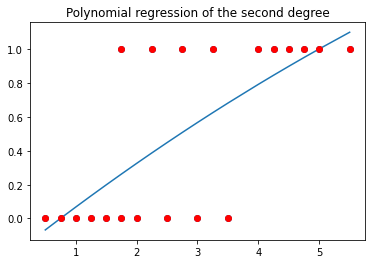

In [12]:
polyregpipe=make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
polyregpipe.fit(X,y)

plt.figure()
plt.scatter(X,y)
plt.plot(X, polyregpipe.predict(X))
plt.plot(df['Hours'], df['Result'], 'ro')
plt.title("Polynomial regression of the second degree")
plt.show()

Now we want to compare the polynomial regression of the second degree with the linear regression. In the below, the red dots indicate the original data. The orange one is the linear regression and the blue one is the polynomial regression of the second degree.

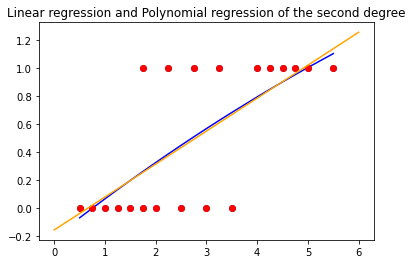

In [13]:
polyregpipe=make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
polyregpipe.fit(X,y)

plt.figure()
plt.scatter(X,y)
plt.plot(X, polyregpipe.predict(X), 'b')
plt.plot(df['Hours'], df['Result'], 'ro')
plt.plot(X_new, y_new, 'orange')
plt.title("Linear regression and Polynomial regression of the second degree")
plt.show()

Now, we establish two functions.
When we pass n, one function shows the formula of the polynomial regression of the n-th degree and the other one provides its graph. Let's begin with the first one.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(degree=2):
    polyreg = PolynomialFeatures(degree, include_bias=False)
    X_poly = polyreg.fit_transform(X)

    regressor = LinearRegression()
    regressor.fit(X_poly, y)

    result = f"The coefficients are {regressor.coef_} and the intercept is {regressor.intercept_}."
    return result

In [15]:
poly_regression(degree=2)

'The coefficients are [ 0.28242337 -0.00810915] and the intercept is -0.20674647408291502.'

The formula is not good for human being.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def final(my_list):
    
    result = str(my_list[0])
    index_list = list(range(len(my_list)))
    as_dict = dict(zip(index_list, my_list))

    for n in index_list[1:]:
        if as_dict.get(n) >= 0:
            result = result + " + " + str(as_dict.get(n)) + f" x^{n}"
        else:
            result = result + " + " + "(" + str(as_dict.get(n)) + ")" + f" x^{n}"
    return "y = " + result

def poly_regression(degree=2):
    polyreg = PolynomialFeatures(degree, include_bias=False)
    X_poly = polyreg.fit_transform(X)

    regressor = LinearRegression()
    regressor.fit(X_poly, y)

    coef_list = list(regressor.coef_)
    coef_list.insert(0, regressor.intercept_)   
    
    return coef_list

In [17]:
final(poly_regression(degree=2))

'y = -0.20674647408291502 + 0.2824233679674526 x^1 + (-0.008109150934981093) x^2'

It is better, isn't it? Let's pass 5!

In [18]:
final(poly_regression(degree=5))

'y = 0.6734405846218916 + (-2.4326669952502287) x^1 + 2.7192877606301415 x^2 + (-1.171894070754416) x^3 + 0.22301841400742262 x^4 + (-0.015440177488375895) x^5'

It is too long! Let's round to 4 decimals!

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def final(my_list):
    
    result = str(round(my_list[0], 4))
    index_list = list(range(len(my_list)))
    as_dict = dict(zip(index_list, my_list))

    for n in index_list[1:]:
        if as_dict.get(n) >= 0:
            result = result + " + " + str(round(as_dict.get(n), 4)) + f" x^{n}"
        else:
            result = result + " + " + "(" + str(round(as_dict.get(n), 4)) + ")" + f" x^{n}"
    return "y = " + result

def poly_regression(degree=2):
    polyreg = PolynomialFeatures(degree, include_bias=False)
    X_poly = polyreg.fit_transform(X)

    regressor = LinearRegression()
    regressor.fit(X_poly, y)

    coef_list = list(regressor.coef_)
    coef_list.insert(0, regressor.intercept_)   
    
    return coef_list

Let's pass 7!

In [20]:
final(poly_regression(degree=7))

'y = -1.5515 + 8.0388 x^1 + (-15.4319) x^2 + 14.0746 x^3 + (-6.62) x^4 + 1.6579 x^5 + (-0.2098) x^6 + 0.0105 x^7'

It is much better! 
Now, we estblish the second function to obtin the graphs.

In [21]:
# We define the following dictionary for the title of plots.
dic_for_degree = {
    2 : "second",
    3 : "third",
    4 : "fourth",
    5 : "fifth",
    6 : "sixth",
    7 : "seventh",
    8 : "eighth",
    9 : "nineth",
    10 : "tenth"
}


def poly_graph(degree=2):
    polyregpipe=make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
    polyregpipe.fit(X,y)

    
    plt.scatter(X,y)
    plt.plot(X, polyregpipe.predict(X))
    plt.plot(df['Hours'], df['Result'], 'ro')
    plt.title(f"Polynomial regression of the {dic_for_degree.get(degree)} degree")
    plt.show()
    return plt.figure()

Does it work well?

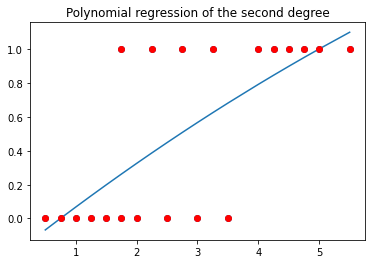

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
poly_graph(degree=2)

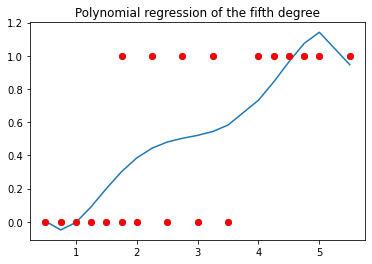

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
poly_graph(degree=5)

When we need polynomial regressions of several degrees, I believe the above is better than copy and paste!
The following is a direct programming to see the graph of the polynomial regression of the fifth degree.

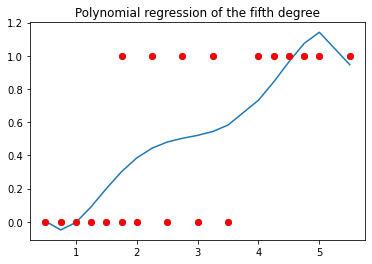

In [24]:
polyreg=make_pipeline(PolynomialFeatures(5),LinearRegression())
polyreg.fit(X,y)
plt.figure()
plt.scatter(X,y)
plt.plot(X,polyreg.predict(X))
plt.plot(df['Hours'], df['Result'], 'ro')
plt.title("Polynomial regression of the fifth degree")
plt.show()

Actually, I tried to use a decorator for the 19th cell. I cannot handle arguments and keyword arguments! I will try it again!